In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

### Iteration with `for`

Use `for .. in .. :` to create a loop.

- After `for` is a variable that will be available in each iteration
- After in as an iterable, such as a list, collection, or `range()`
- The lines following must be indented. Everything within the indented block will be repeated on each iteration. 

In [1]:
for number in range(10):
    print(number)

0
1
2
3
4
5
6
7
8
9


### Control flow with `if`, `else`, `elif`

`if .. :` sets a condition. If the condition resolves to `True`, the following indented code block will execute. If not, that code will be skipped.
- The code block following `if` must be indented

In [9]:
letters = 'abcdefghijklmnopqrstuvwxyz'

In [10]:
vowels = ['a','e','i','o','u']

In [14]:
for letter in letters:
    if letter in vowels:
        print(letter, ' is a vowel')

a  is a vowel
e  is a vowel
i  is a vowel
o  is a vowel
u  is a vowel


Optionally, `else:` sets up code to run only if the `if` condition is false.

In [11]:
for letter in letters:
    if letter in vowels:
        print(letter, ' is a vowel')
    else:
        print(letter, ' is a consonant')

a  is a vowel
b  is a consonant
c  is a consonant
d  is a consonant
e  is a vowel
f  is a consonant
g  is a consonant
h  is a consonant
i  is a vowel
j  is a consonant
k  is a consonant
l  is a consonant
m  is a consonant
n  is a consonant
o  is a vowel
p  is a consonant
q  is a consonant
r  is a consonant
s  is a consonant
t  is a consonant
u  is a vowel
v  is a consonant
w  is a consonant
x  is a consonant
y  is a consonant
z  is a consonant


Optionally, `elif .. :` (else if) sets up a second conditional test. Code below this condition will fun only if the `if` condition is False and the `elif` condition is True

In [15]:
sometimes_vowel = 'y'

In [16]:
for letter in 'abcdefghijklmnopqrstuvwxyz':
    if letter == sometimes_vowel:
        print(letter, ' is sometimes a vowel')
    elif letter in vowels:
        print(letter, ' is a vowel')
    else:
        print(letter, ' is a consonant')

a  is a vowel
b  is a consonant
c  is a consonant
d  is a consonant
e  is a vowel
f  is a consonant
g  is a consonant
h  is a consonant
i  is a vowel
j  is a consonant
k  is a consonant
l  is a consonant
m  is a consonant
n  is a consonant
o  is a vowel
p  is a consonant
q  is a consonant
r  is a consonant
s  is a consonant
t  is a consonant
u  is a vowel
v  is a consonant
w  is a consonant
x  is a consonant
y  is sometimes a vowel
z  is a consonant


### Iteration for data exploration

In [17]:
energy_water = pd.read_csv( 
   'https://data.cityofnewyork.us/api/views/usc3-8zwd/rows.csv?accessType=DOWNLOAD',
   na_values=['Not Available']
)

C:\Users\dlevine\AppData\Local\Temp\ipykernel_40120\4107827597.py:1: DtypeWarning: Columns (9,54,55,194,199,228,229,230) have mixed types. Specify dtype option on import or set low_memory=False.
  energy_water = pd.read_csv(


In [64]:
y_cols = [
    'Total GHG Emissions (Metric Tons CO2e)',
    'Electricity Use - Grid Purchase (kWh)',
    'Water Use (All Water Sources) (kgal)'
]

x_cols = [
    'Property GFA - Calculated (Buildings) (ft²)',
    'Multifamily Housing - Number of Bedrooms',
]

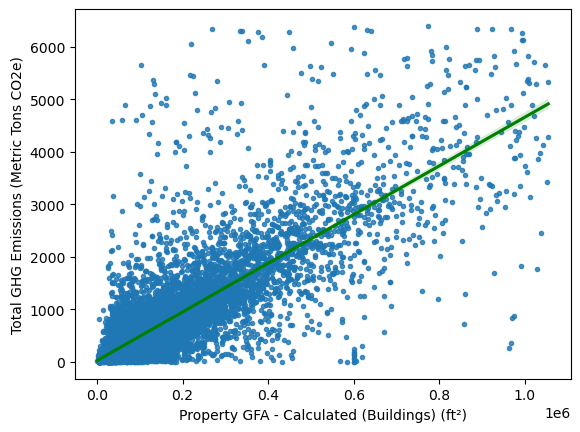

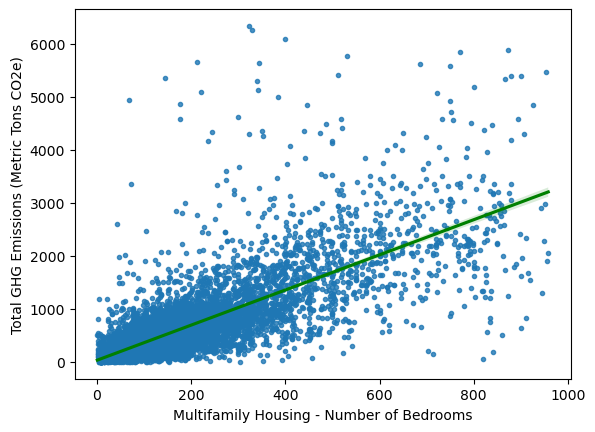

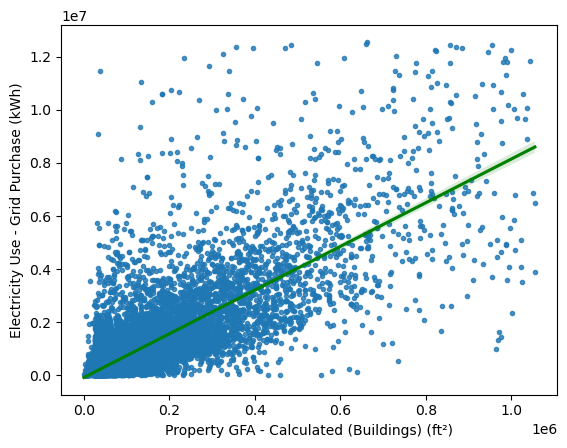

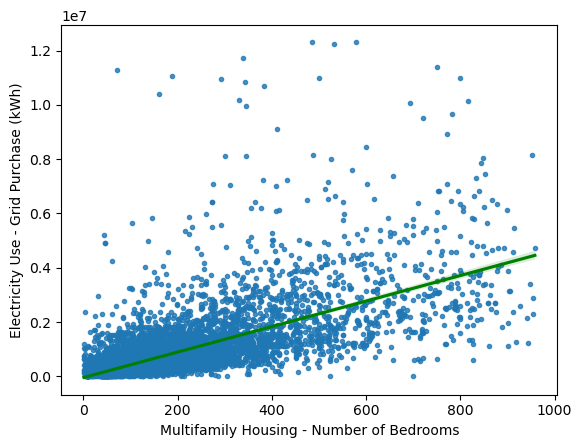

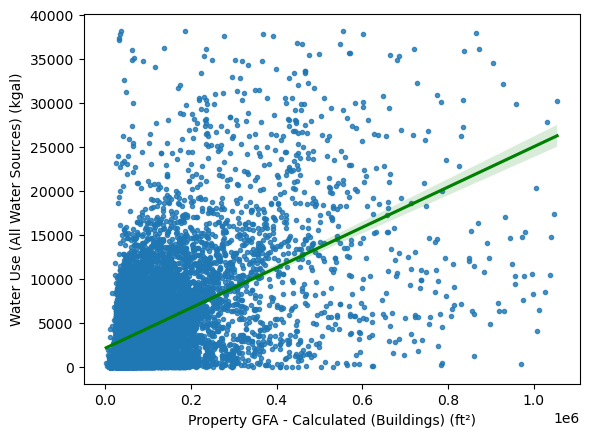

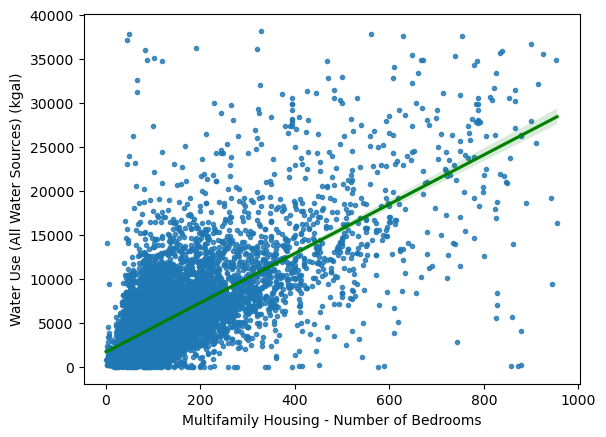

In [66]:
for y_col in y_cols:
    for x_col in x_cols:

        subset = (
            energy_water
            [
                energy_water[x_col].lt(energy_water[x_col].quantile(0.99))
                &
                energy_water[x_col].gt(0)
                &
                energy_water[y_col].lt(energy_water[y_col].quantile(0.99))
                &
                energy_water[y_col].gt(0)
            ]
        )

        sns.regplot(
            data=subset,
            y=y_col,
            x=x_col,
            marker='.',
            line_kws=dict(color='green')
        )

        plt.show()

In [67]:
results_list = []

for y_col in y_cols:
    for x_col in x_cols:
        
        subset = (
            energy_water
            [
                energy_water[x_col].lt(energy_water[x_col].quantile(0.99))
                &
                energy_water[x_col].gt(0)
                &
                energy_water[y_col].lt(energy_water[y_col].quantile(0.99))
                &
                energy_water[y_col].gt(0)
            ]
        )

        formula = f'Q("{y_col}") ~ Q("{x_col}")'

        model = smf.ols(data=subset, formula=formula)

        fit_model = model.fit()

        model_coef = fit_model.params.loc[f'Q("{x_col}")']
        model_rsquared = fit_model.rsquared

        results_list.append(
            pd.DataFrame(
                {
                    'y_col':[y_col],
                    'x_col':[x_col],
                    'model_coef':[model_coef],
                    'model_rsquared':[model_rsquared]
                }
            )
        )

results = pd.concat(results_list, ignore_index=True)

results

,y_col,x_col,model_coef,model_rsquared
0,Total GHG Emissions (Metric Tons CO2e),Property GFA - Calculated (Buildings) (ft²),0.004636,0.697971
1,Total GHG Emissions (Metric Tons CO2e),Multifamily Housing - Number of Bedrooms,3.317541,0.632504
2,Electricity Use - Grid Purchase (kWh),Property GFA - Calculated (Buildings) (ft²),8.232371,0.623858
3,Electricity Use - Grid Purchase (kWh),Multifamily Housing - Number of Bedrooms,4698.730771,0.510423
4,Water Use (All Water Sources) (kgal),Property GFA - Calculated (Buildings) (ft²),0.022877,0.267565
5,Water Use (All Water Sources) (kgal),Multifamily Housing - Number of Bedrooms,27.997206,0.488695
